<a href="https://colab.research.google.com/github/doyinsolamiolaoye/hamoye_internship/blob/master/Hamoye_stage_one_quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Python for Machine Learning - Understanding Electric Utility Data

The data provided in this [Github link](https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv) is the fuel quality data from the Federal Energy Regulatory Commission which is provided by the United States Energy Information Administration. The data consists of the following columns:

* Record_id : record id
* Utility_id_ferc1: Utility id assigned by the FERC
* Report_year: year of report
* Plant_name_ferc1: the name of the plant
* Fuel_type_code_pudl: the type of fuel
* Fuel_unit: the unit of fuel
* Fuel_qty_burned: the quantity of fuel burned
* Fuel_mmbtu_per_unit: the measure of energy per unit
* fuel_cost_per_unit_burned: the fuel cost per unit burned
* Fuel_cost_per_unit_delivered: the cost of fuel delivered per unit
* fuel_cost_per_mmbtu: the cost of fuel per mmbtu


## Exploring the Data

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv")

In [3]:
# view the first 5 rows
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [4]:
#view last 5 rows
df.tail()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.03
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.95
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.99
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.11
29522,f1_fuel_2018_12_12_1_14,12,2018,wygen 3 bhp 52%,gas,mcf,17853.0,1.059,0.00,0.00,11.68


In [5]:
#The number of rows and columns

df.shape

(29523, 11)

In [6]:
#Descriptive statistics including those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

df.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [7]:
#column labels
df.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [8]:
#check for the number of distinct observations in the df
df.nunique()

record_id                       29523
utility_id_ferc1                  185
report_year                        25
plant_name_ferc1                 2315
fuel_type_code_pudl                 6
fuel_unit                           9
fuel_qty_burned                 26432
fuel_mmbtu_per_unit             11227
fuel_cost_per_unit_burned       19416
fuel_cost_per_unit_delivered    16675
fuel_cost_per_mmbtu             12605
dtype: int64

In [9]:
# check for distinct fuel types

df['fuel_type_code_pudl'].unique()

array(['coal', 'gas', 'nuclear', 'oil', 'waste', 'other'], dtype=object)

### Solution to Quiz

Question 1 -


If you’re given two lists:

A = [1,2,3,4,5,6], B = [13, 21, 34]

The task is to create a list with the elements of A and B in a single dimension with output:

A_B =  [1,2,3,4,5,6,13, 21, 34]

Which of the following option is the best way to create this list?


In [10]:
A = [1,2,3,4,5,6]
B = [13, 21, 34]
A.extend(B)
A

[1, 2, 3, 4, 5, 6, 13, 21, 34]

Question 2 -How do you create an identity matrix in python?

In [11]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Question 3 - Which of the following fuel type code has the lowest average fuel cost per unit burned?

In [12]:
df.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean().sort_values()

fuel_type_code_pudl
gas          13.659397
other        18.253856
waste        19.518122
coal         67.421830
oil         168.877086
nuclear    4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64

Question 4 -What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?

In [13]:
#Standard deviation of fuel_mmbtu_per_unit in 2 decimal places
round(df['fuel_mmbtu_per_unit'].std(), 2)

10.6

In [14]:
# 75th percentile of fuel_mmbtu_per_unit in 2 decimal places
round(df['fuel_mmbtu_per_unit'].quantile(0.75), 2)

17.01

Question 5 - What is the skewness and kurtosis for the fuel quantity burned in two decimal places?

In [15]:
#skewness of fuel quantity burned in 2 decimal places
round(df['fuel_qty_burned'].skew(), 2)

15.85

In [16]:
#kurtosis of fuel quantity burned in 2 decimal places
round(df['fuel_qty_burned'].kurtosis(), 2)

651.37

Question 6 - 

Which feature has missing values and what is the total number of missing value and percentage of the missing rows as a factor of the total number of rows in three decimal places? 

(Enter answer in the format: Feature: xxx, Total: xxx, Percent: xxx)

In [17]:
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [18]:
# Percentage of the missing rows
round(sum(df.isnull().sum())/ len(df),3)

0.006

Question 7 - The feature with missing values falls under what category? What missing value imputation technique would you use?

In [19]:
# fill the missing values with the mode becuase there is a frequent value which is 'mcf'
df['fuel_unit'].fillna(df['fuel_unit'].mode()[0], inplace=True)

In [20]:
#confirm the filling of missing values
df.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

Question 8 - Which of the features has the second and third lowest correlation with the Fuel Cost Per Unit Burned?

In [21]:
#correlation matrix

corelation = df.corr()
corelation

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


In [22]:
# correaltion of features in ascending order

corelation['fuel_cost_per_unit_burned'].sort_values()

utility_id_ferc1               -0.037863
fuel_qty_burned                -0.018535
fuel_mmbtu_per_unit            -0.010034
fuel_cost_per_mmbtu            -0.000437
fuel_cost_per_unit_delivered    0.011007
report_year                     0.013599
fuel_cost_per_unit_burned       1.000000
Name: fuel_cost_per_unit_burned, dtype: float64

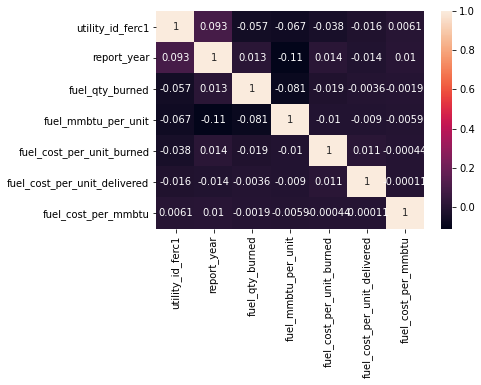

In [23]:
# heatmap showing correlations
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)

Question 9 - For the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994?

In [24]:
df_coal = df.groupby('fuel_type_code_pudl').get_group('coal')
df_coal_year = df_coal.groupby('report_year')['fuel_cost_per_unit_burned'].sum()
per_change = pd.Series([df_coal_year[1994] ,df_coal_year[1998]]).pct_change()
per_change

0         NaN
1   -0.205677
dtype: float64

Question 10 - Which year has the highest average fuel cost per unit delivered?

In [25]:
df.groupby('report_year')['fuel_cost_per_unit_delivered'].mean().sort_values(ascending=False).head()

report_year
1997    11140.197239
1996     9196.705948
2000      985.362877
2009      652.694163
2018      499.269966
Name: fuel_cost_per_unit_delivered, dtype: float64

## Conclusion

It can be inferred from the results above that:
* The fuel type code has the lowest average fuel cost per unit burned is gas
* The standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places are `10.60` and `17.01` respectively
* The skewness and kurtosis for the fuel quantity burned in two decimal places are `15.85` and `651.37` respectively.
* The feature with missing values falls under the categorical feature and the mode imputation technoque is used.
* The features has the second and third lowest correlation with the Fuel Cost Per Unit Burned are `fuel_qty_burned` and `fuel_mmbu_per_unit`.
* For the fuel type coal, the percentage change in the fuel cost per unit burned in 1998 compared to 1994 is `-21%`.
* The year with the highest average fuel cost per unit delivered is 1997.

Thank you!